# Sampling

In Audio Signal Processing, sampling is the process of converting a continuous signal into a discrete signal.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.style.use('seaborn-v0_8-whitegrid')

## Continuous Time (CT) Signals

In the analog domain, a sinusoidal signal is a continuous waveform that can be described by the equation:
$$
x(t) = A \cos(\omega_0 t + \phi)
$$

Where:
- $x(t)$ represents the signal amplitude at a specific time $t$.
- $A$ is the amplitude of the signal, which determines its peak heigth.
- $\omega_0$ is the angular frequency in radians per second. It determines how fast the signal oscillates. $\omega_0 = 2 \pi f $, where $f$ is the frequency in Hertz (cycles per second).
- $\phi$ is the phase-shift of the signal. It determines the position of the signal relative to time $t=0$.
- $t$ is the continuous time variable.

Frequency ($f$) is a crucial parameter. It tells us how many cycles of the waveform occur in one second. It's the inverse of the period ($T$), where $T$ is the time taken for one complete cycle. The relationship between frequency and period is given by:
$$
f = \frac{1}{T} \quad \text{and} \quad T = \frac{1}{f}
$$

In [3]:
# Define a signal with amplitude, frequency, phase, and sample rate
A= .7       # Amplitude
f0= 1       # Frequency
phi= 0      # Phase
fs= 16      # Sampling rate

# Define a time vector
t = np.arange(-1.1, 1.1, 1.0 / fs)

x = A * np.cos(2 * np.pi * f0 * t + phi)

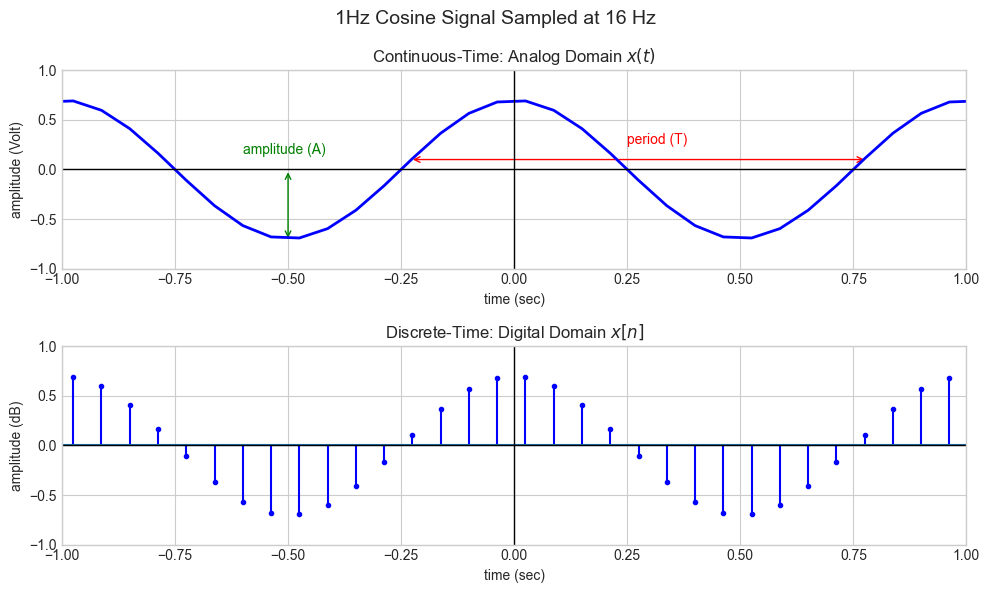

In [4]:
fig = plt.figure(figsize=(10, 6))
plt.suptitle(f'1Hz Cosine Signal Sampled at {fs} Hz', size='14')

ax1 = fig.add_subplot(211, xlabel='time (sec)', ylabel='amplitude (Volt)', xlim=(-1, 1), ylim=(-1.0, 1.0))
ax1.plot(t, x, 'b', lw=2)
ax1.set_title('Continuous-Time: Analog Domain $x(t)$', size='12' )
ax1.grid(True)
ax1.axvline(x=0, color='k', linestyle='solid', linewidth=1)
ax1.axhline(y=0, color='k', linestyle='solid', linewidth=1)
ax1.text(-0.6, 0.2, 'amplitude (A)', fontsize=10, verticalalignment='center', color='g')
arrow_style = patches.FancyArrowPatch((-0.5, 0.), (-0.5, -0.72), color='g', mutation_scale=10, arrowstyle='<->')
plt.gca().add_patch(arrow_style)
ax1.text(0.25, 0.3, 'period (T)', fontsize=10, verticalalignment='center', color='r')
arrow_style = patches.FancyArrowPatch((-0.23, 0.1), (0.78, 0.1), color='r', mutation_scale=10, arrowstyle='<->')
plt.gca().add_patch(arrow_style)

ax2 = fig.add_subplot(212, sharex=ax1, xlabel='time (sec)', ylabel='amplitude (dB)', xlim=(-1, 1), ylim=(-1.0, 1.0))
ax2.stem(t, x, linefmt='b-', markerfmt='.', basefmt='')
ax2.grid(True)
ax2.axvline(x=0, color='k', linestyle='solid', linewidth=1)
ax2.axhline(y=0, color='k', linestyle='solid', linewidth=1)
plt.title('Discrete-Time: Digital Domain $x[n]$', size='12')
plt.tight_layout()
plt.show()

## Discrete Time Signals

In the digital domain, we work with discrete-time signals, which means we have samples of the signal taken at regular intervals. The same sinusoidal signal can be represented digitally as:
$$
x[n] = A \cos\left(\frac{2\pi}{N} n + \phi\right)
$$

Where:
- $x[n]$ represents the signal amplitude at a specific sample index $n$.
- $A$ is the amplitude of the signal, which determines its peak heigth.
- $\frac{2\pi}{N}$ is the angular frequency, where $N$ is the number of samples per period. It determines how many samples we take for one cycle of the waveform.
- $\phi$ is the phase-shift.
- $n$ is the discrete time index.

In the digital domain, the frequency ($f_d$) is related to the digital angular frequency $$f_d = \frac{f_s}{N}$$

Where:
- $f_d$ is the digital frequency in Hertz (cycles per second).
- $f_s$ is the sampling frequency in Hertz (samples per second).
- $N$ is the number of samples per period.

in the digital domain, we represent continuous analog signals by discretizing them into individual samples, and the digital angular frequency is related to the analog frequency and the number of samples per period. This allows us to work with signals in a digital, quantized form for processing and analysis.

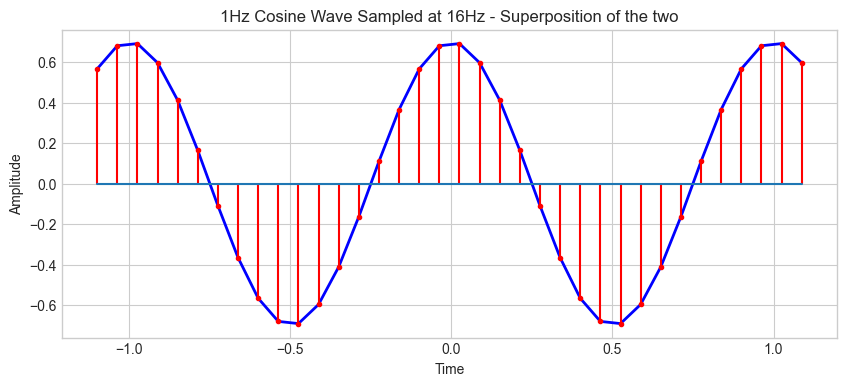

In [5]:
fig = plt.figure(figsize=(10, 4))
plt.plot(t, x, 'b', lw=2, label='original')
plt.stem(t, x, linefmt='r-', markerfmt='.', basefmt='', label='12Hz sample rate')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title(f'1Hz Cosine Wave Sampled at {fs}Hz - Superposition of the two')
plt.show()

## Sine and Cosine Waves

Mathematically, a sinusoidal signal in continuous-time can be represented as:
$$
x(t) = A \sin(\omega_0 t + \phi)
$$

While in the digital domain, we express the frequency of the signal with the 
$$
x[n] = A \sin\left(\frac{2\pi}{N}n + \phi\right)
$$

In Python, we can generate a sinusoidal signal using the `np.sin()` function from the NumPy library. 

```python
x[n] = A * np.sin(2 * np.pi * f0 * t + phi)
```

- `sin` represents a cosine wave, and sin represents a sine wave.
- `A` is the amplitude of the waves.
- `f0` is the frequency of the waves in Hertz.
- `t` is the time axis.

Simply by replacing `np.sin()` with `np.cos()`, we can generate a cosine wave.

```python
x[n] = A * np.cos(2 * np.pi * f0 * t + phi)
```

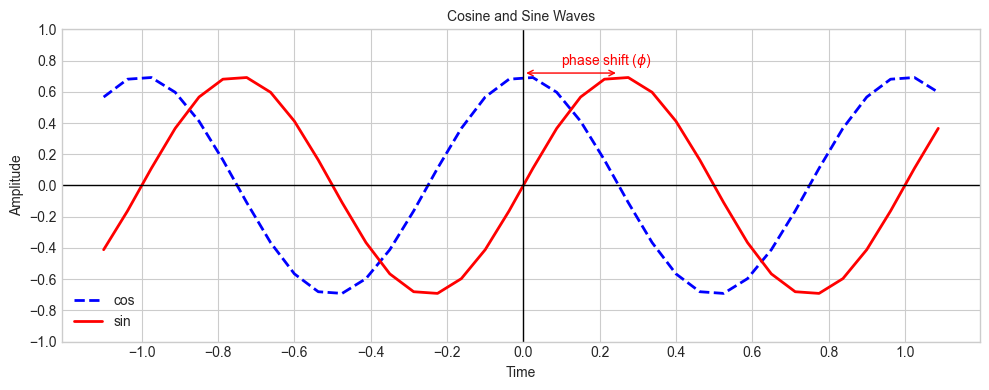

In [6]:
cos = A * np.cos(2 * np.pi * f0 * t + phi)
sin = A * np.sin(2 * np.pi * f0 * t + phi)

fig = plt.figure(figsize=(10, 4))
plt.plot(t, cos, 'b', lw=2, label='cos', linestyle='--')
plt.plot(t, sin, 'r', lw=2, label='sin')
plt.xticks(np.arange(-1, 1.1, 0.2))
plt.yticks(np.arange(-1, 1.1, 0.2))

plt.axvline(x=0, color='k', linestyle='solid', linewidth=1)
plt.axhline(y=0, color='k', linestyle='solid', linewidth=1)
plt.text(0.1, 0.8, 'phase shift ($\\phi$)', fontsize=10, verticalalignment='center', color='r')
arrow_style = patches.FancyArrowPatch((0., 0.72), (0.25, 0.72), color='r', mutation_scale=10, arrowstyle='<->')
plt.gca().add_patch(arrow_style)
plt.legend(loc='best', fontsize=10)
plt.xlabel('Time', fontsize=10)
plt.ylabel('Amplitude', fontsize=10)
plt.title('Cosine and Sine Waves', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()